In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
path = '../data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


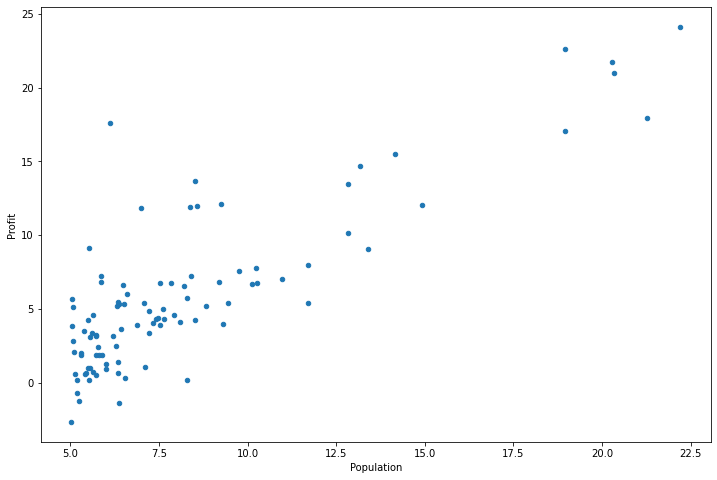

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))

In [5]:
def computeCost(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)

    return np.sum(inner) / 2 * len(x)

In [6]:
data.insert(0, 'Ones', 1)

In [7]:
# x training data and y target variable
cols = data.shape[1]
x = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [8]:
x.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [11]:
theta

matrix([[0, 0]])

In [12]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [13]:
computeCost(x, y, theta)

301772.35305298044

In [14]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (x * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, x[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(x)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(x, y, theta)

    return theta, cost

In [15]:
alpha = 0.01
iters = 1000

In [16]:
g, cost = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [17]:
cost[0:10]

array([63390.22508396, 55810.363887  , 55523.96463893, 55468.20576985,
       55419.90331979, 55372.0041268 , 55324.28470894, 55276.73740262,
       55229.36136619, 55182.15597573])

In [18]:
computeCost(x, y, g)

42490.62532846948

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

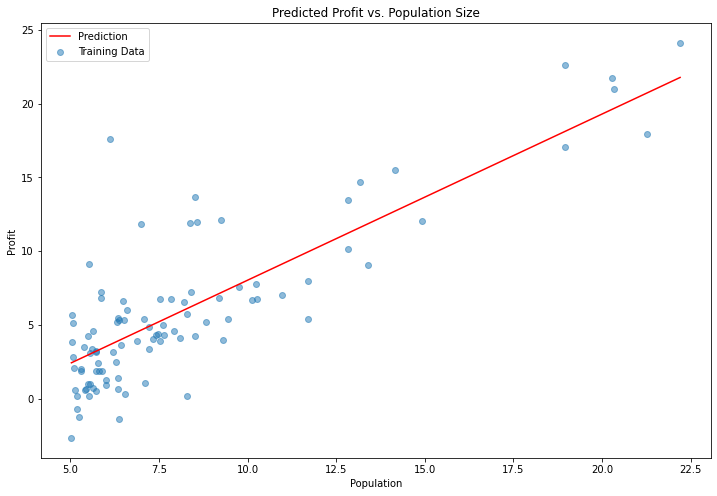

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data', alpha=0.5)
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

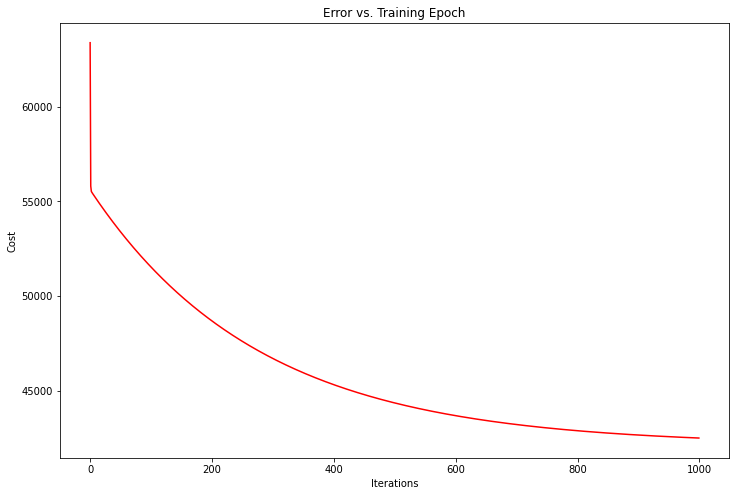

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')